#  Coding Assignment #3 - Fraud Detection Models

In [1]:
!conda info


     active environment : base
    active env location : /home/dima/anaconda3
            shell level : 1
       user config file : /home/dima/.condarc
 populated config files : 
          conda version : 24.5.0
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=skylake
                          __conda=24.5.0=0
                          __glibc=2.31=0
                          __linux=5.15.0=0
                          __unix=0=0
       base environment : /home/dima/anaconda3  (writable)
      conda av data dir : /home/dima/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/dima

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

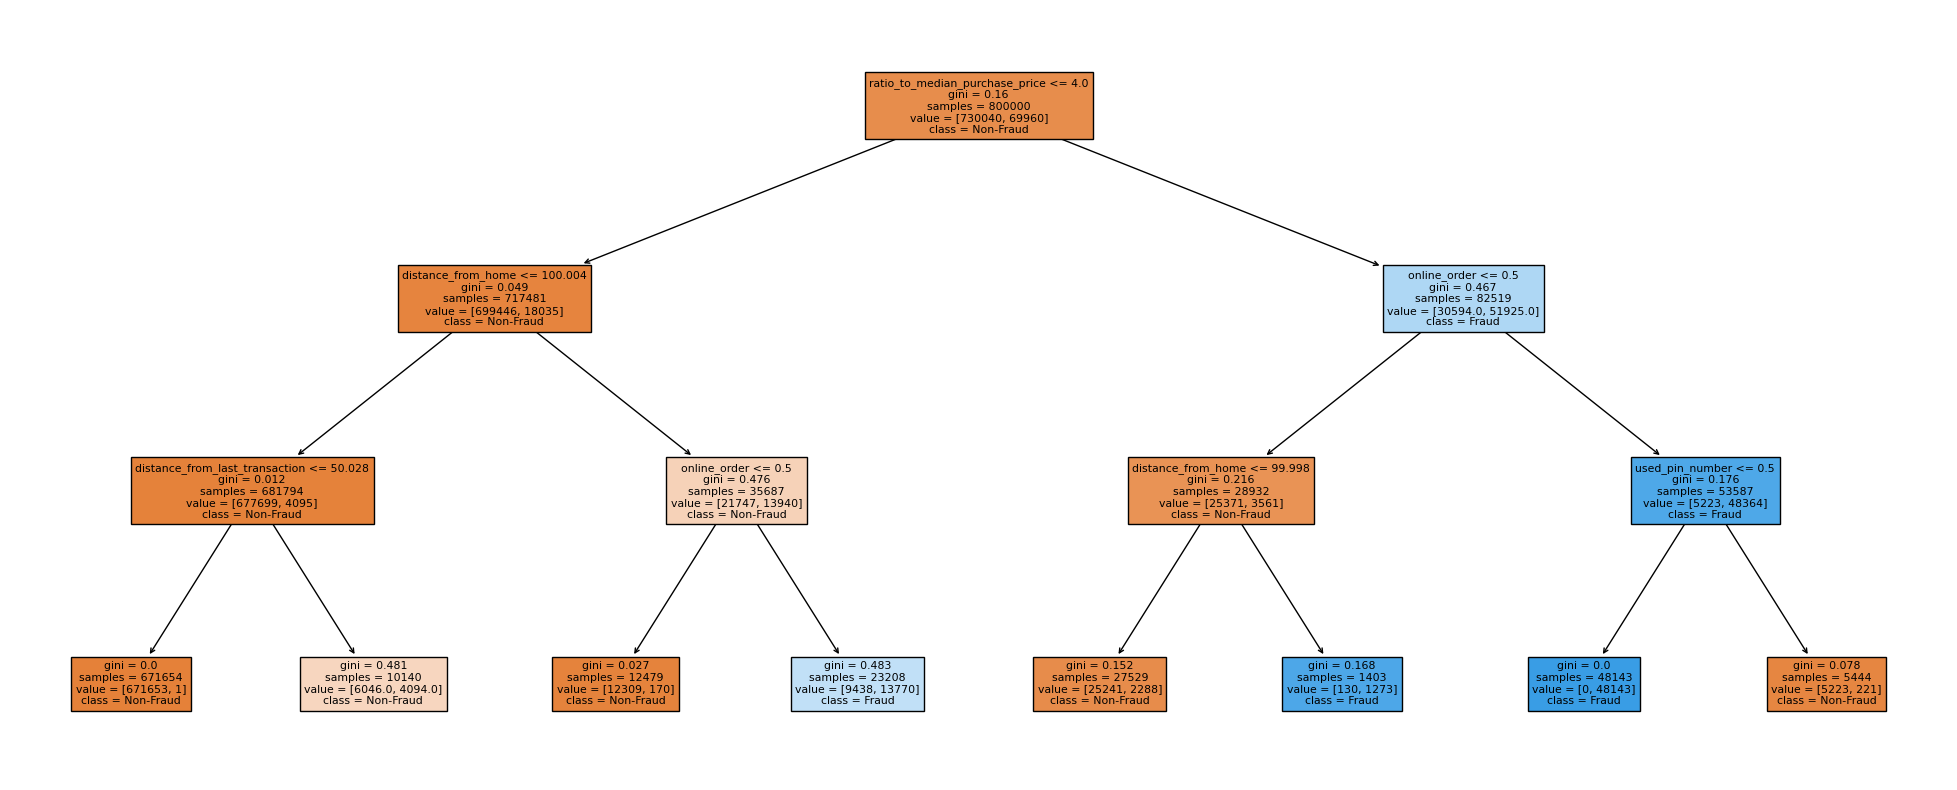

In [27]:

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model_dtc = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model_dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = model_dtc.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
classification_rep_dtc = classification_report(y_test, y_pred_dtc)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dtc:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep_dtc)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model_dtc, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


---

# Submission

 ## Data Analysis: 
 - Deepen your understanding of the dataset by performing additional exploratory data analysis.

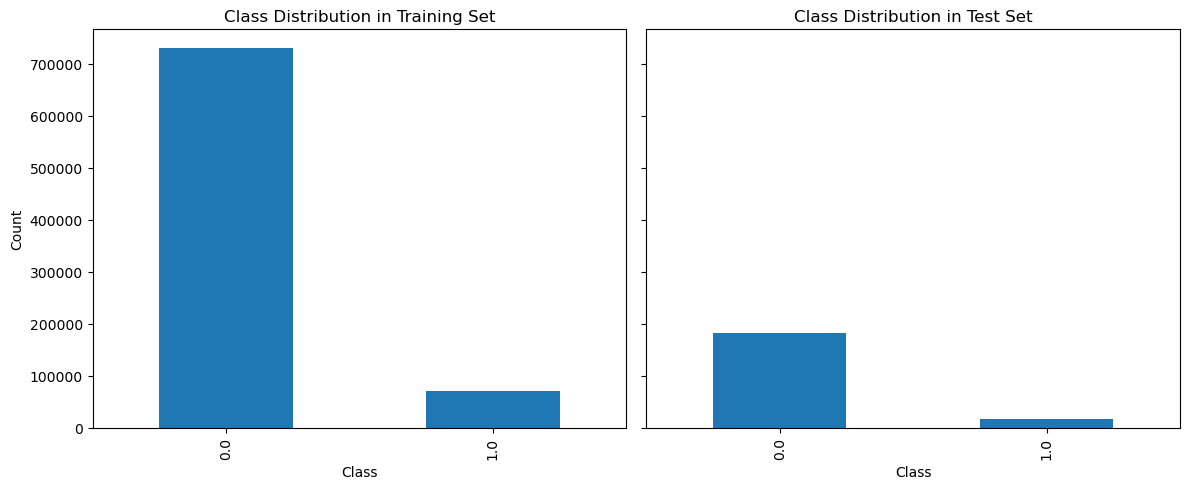

In [11]:
# Class distribution in training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution in Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Test set
y_test.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Class Distribution in Test Set')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()


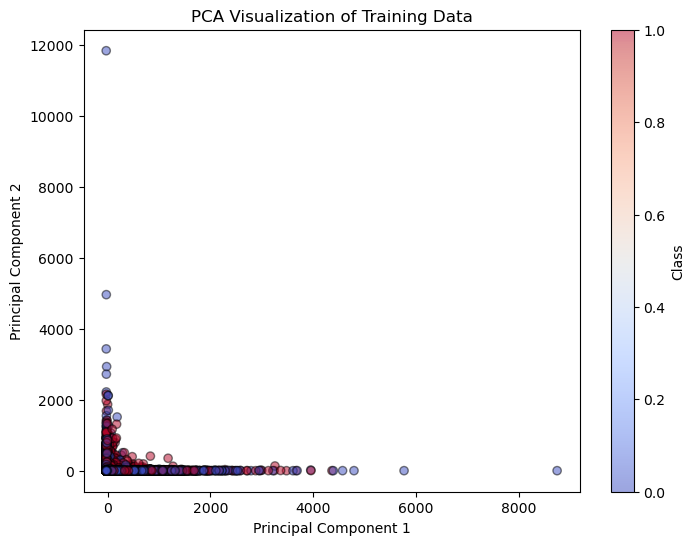

In [13]:
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE ## slower that PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, edgecolor='k')
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


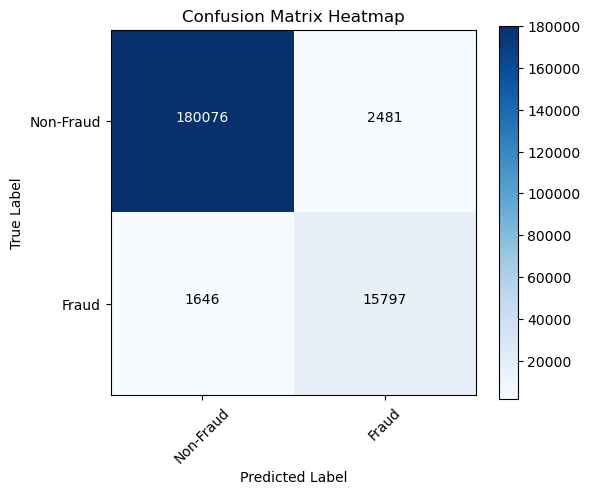

In [14]:
# Predictions and confusion matrix
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Fraud', 'Fraud'], rotation=45)
plt.yticks(tick_marks, ['Non-Fraud', 'Fraud'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()


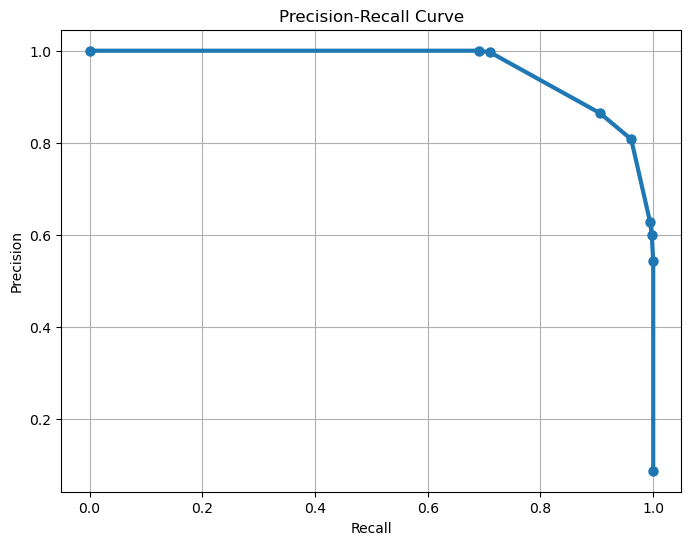

In [24]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model_dtc.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', markersize=13, linewidth=3)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


## Model Building and Evaluation: 
- Beyond the decision tree, experiment with another model such as Random Forest to compare performance.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the random forest model on the training data
model_rfc.fit(X_train, y_train)

# Make predictions using the random forest
y_pred_rfc = model_rfc.predict(X_test)

# Evaluate the decision tree
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
classification_rep_dtc = classification_report(y_test, y_pred_dtc)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dtc:.4f}")
print("Confusion Matrix:")
print(confusion_dtc)
print("Classification Report:")
print(classification_rep_dtc)

# Evaluate the random forest
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rfc:.4f}")
print("Confusion Matrix:")
print(confusion_rfc)
print("Classification Report:")
print(classification_rep_rfc)

Decision Tree Results:
Accuracy: 0.9794
Confusion Matrix:
[[180076   2481]
 [  1646  15797]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000


Random Forest Results:
Accuracy: 0.9735
Confusion Matrix:
[[182557      0]
 [  5294  12149]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    182557
         1.0       1.00      0.70      0.82     17443

    accuracy                           0.97    200000
   macro avg       0.99      0.85      0.90    200000
weighted avg       0.97      0.97      0.97    200000



## Performance Metrics: 
- Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.

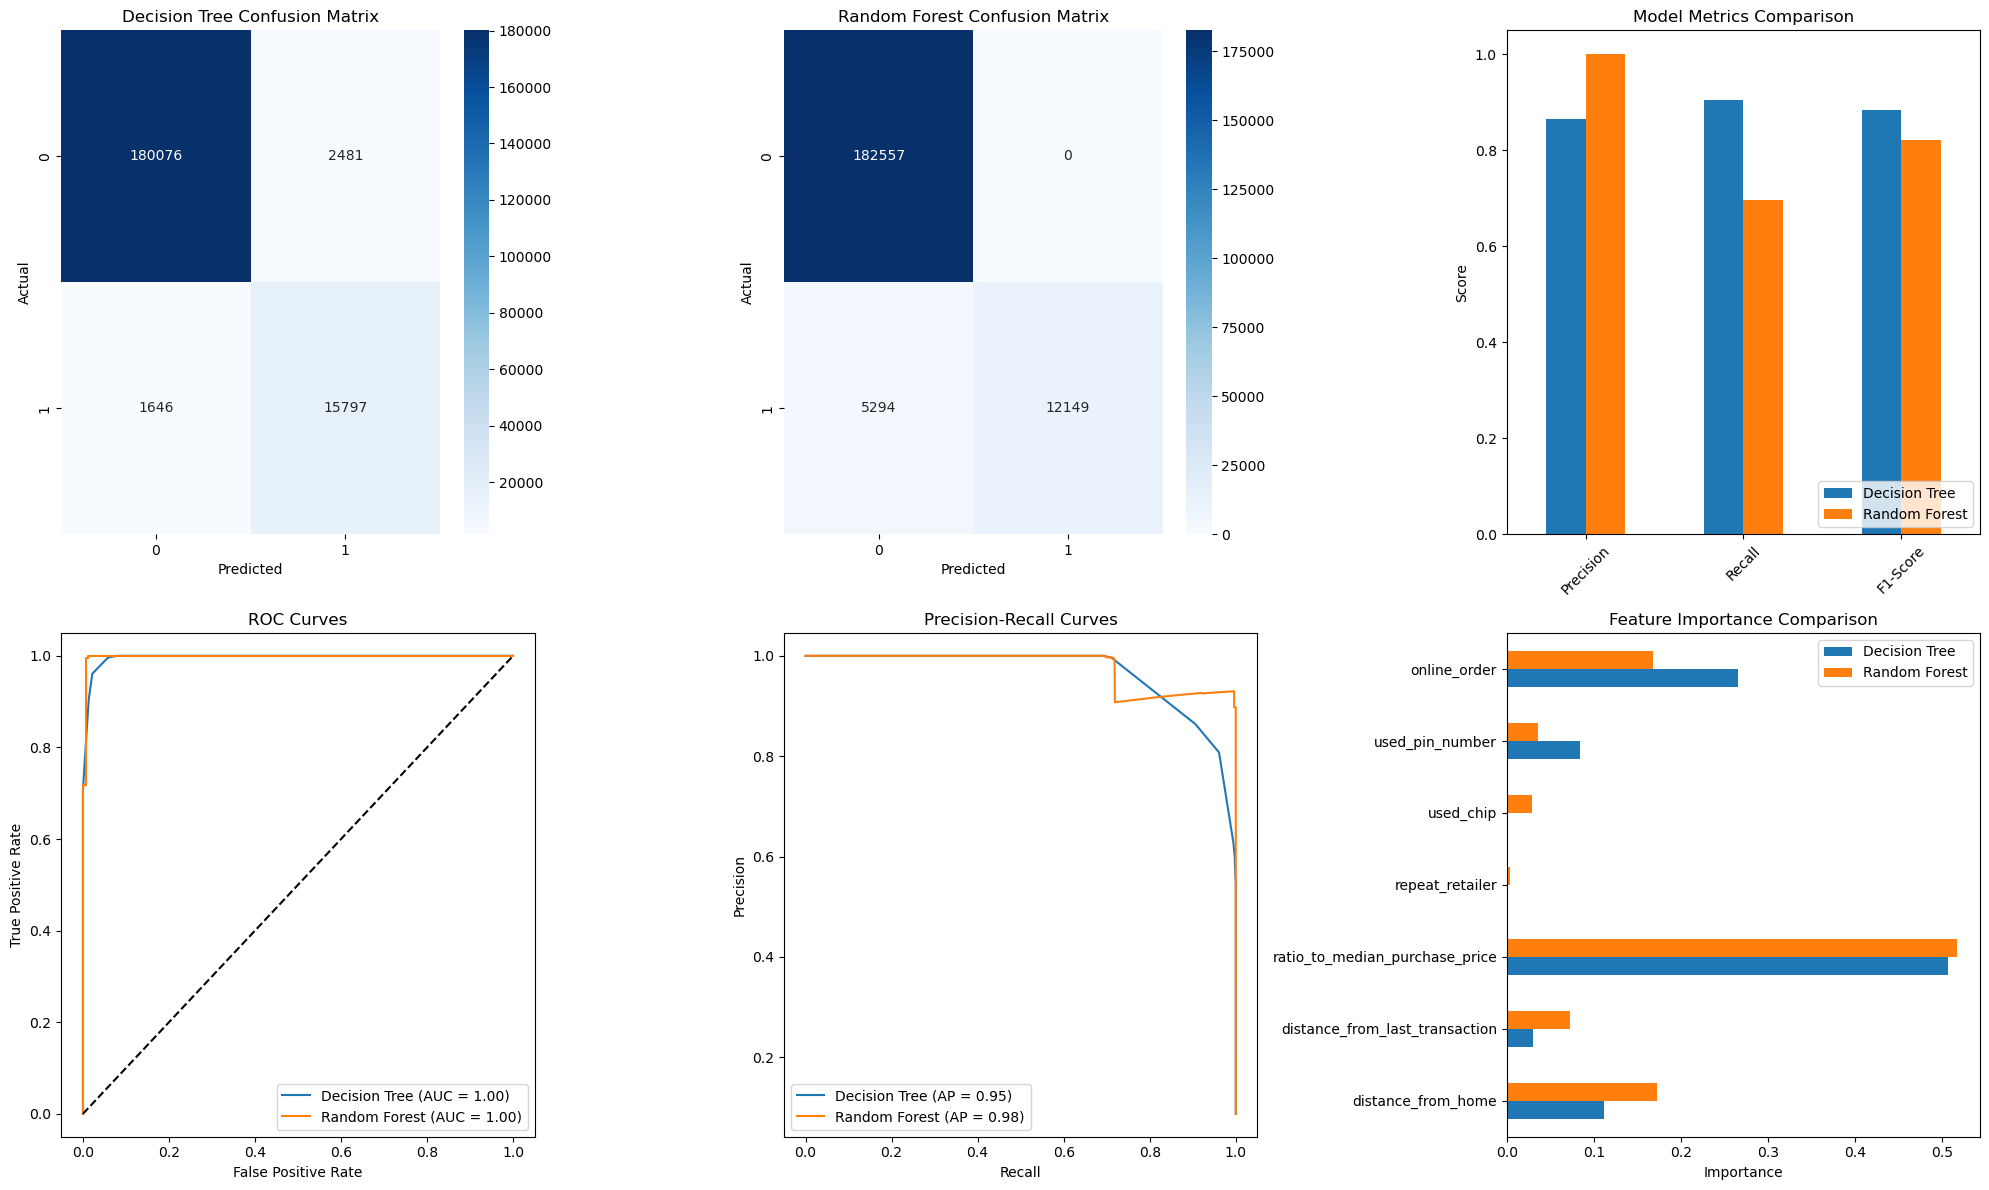


Detailed Metrics Summary:
--------------------------------------------------
           Decision Tree  Random Forest
Precision         0.8643         1.0000
Recall            0.9056         0.6965
F1-Score          0.8845         0.8211
ROC AUC           0.9960         0.9980
PR AUC            0.9480         0.9780


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.gridspec as gridspec

# Calculate metrics for both models
def get_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC AUC': roc_curve(y_true, y_pred_proba[:, 1]),
        'PR AUC': precision_recall_curve(y_true, y_pred_proba[:, 1])
    }

# Get probabilities for both models
y_pred_proba_dtc = model_dtc.predict_proba(X_test)
y_pred_proba_rfc = model_rfc.predict_proba(X_test)

# Calculate metrics
dtc_metrics = get_metrics(y_test, y_pred_dtc, y_pred_proba_dtc)
rfc_metrics = get_metrics(y_test, y_pred_rfc, y_pred_proba_rfc)

# Create a figure with a complex layout
plt.style.use('default')
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 3, figure=fig)

# 1. Confusion Matrix Heatmap Comparison
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Plot confusion matrices
sns.heatmap(confusion_dtc, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Decision Tree Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(confusion_rfc, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 2. Metrics Comparison Bar Plot
ax3 = fig.add_subplot(gs[0, 2])
metrics_df = pd.DataFrame({
    'Decision Tree': [dtc_metrics['Precision'], dtc_metrics['Recall'], dtc_metrics['F1']],
    'Random Forest': [rfc_metrics['Precision'], rfc_metrics['Recall'], rfc_metrics['F1']]
}, index=['Precision', 'Recall', 'F1-Score'])

metrics_df.plot(kind='bar', ax=ax3)
ax3.set_title('Model Metrics Comparison')
ax3.set_ylabel('Score')
ax3.legend(loc='lower right')
plt.xticks(rotation=45)

# 3. ROC Curves
ax4 = fig.add_subplot(gs[1, 0])
# Plot ROC curve for Decision Tree
fpr_dtc, tpr_dtc, _ = dtc_metrics['ROC AUC']
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
ax4.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')

# Plot ROC curve for Random Forest
fpr_rfc, tpr_rfc, _ = rfc_metrics['ROC AUC']
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
ax4.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

ax4.plot([0, 1], [0, 1], 'k--')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curves')
ax4.legend()

# 4. Precision-Recall Curves
ax5 = fig.add_subplot(gs[1, 1])
# Plot PR curve for Decision Tree
precision_dtc, recall_dtc, _ = dtc_metrics['PR AUC']
pr_auc_dtc = average_precision_score(y_test, y_pred_proba_dtc[:, 1])
ax5.plot(recall_dtc, precision_dtc, label=f'Decision Tree (AP = {pr_auc_dtc:.2f})')

# Plot PR curve for Random Forest
precision_rfc, recall_rfc, _ = rfc_metrics['PR AUC']
pr_auc_rfc = average_precision_score(y_test, y_pred_proba_rfc[:, 1])
ax5.plot(recall_rfc, precision_rfc, label=f'Random Forest (AP = {pr_auc_rfc:.2f})')

ax5.set_xlabel('Recall')
ax5.set_ylabel('Precision')
ax5.set_title('Precision-Recall Curves')
ax5.legend()

# 5. Feature Importance Comparison
ax6 = fig.add_subplot(gs[1, 2])
feature_importance_df = pd.DataFrame({
    'Decision Tree': model_dtc.feature_importances_,
    'Random Forest': model_rfc.feature_importances_
}, index=X_train.columns)

feature_importance_df.plot(kind='barh', ax=ax6)
ax6.set_title('Feature Importance Comparison')
ax6.set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Print detailed metrics summary
print("\nDetailed Metrics Summary:")
print("-" * 50)
metrics_summary = pd.DataFrame({
    'Decision Tree': {
        'Precision': dtc_metrics['Precision'],
        'Recall': dtc_metrics['Recall'],
        'F1-Score': dtc_metrics['F1'],
        'ROC AUC': roc_auc_dtc,
        'PR AUC': pr_auc_dtc
    },
    'Random Forest': {
        'Precision': rfc_metrics['Precision'],
        'Recall': rfc_metrics['Recall'],
        'F1-Score': rfc_metrics['F1'],
        'ROC AUC': roc_auc_rfc,
        'PR AUC': pr_auc_rfc
    }
})
print(metrics_summary.round(4))

## - Advanced Techniques (Extra Credit): 
- Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

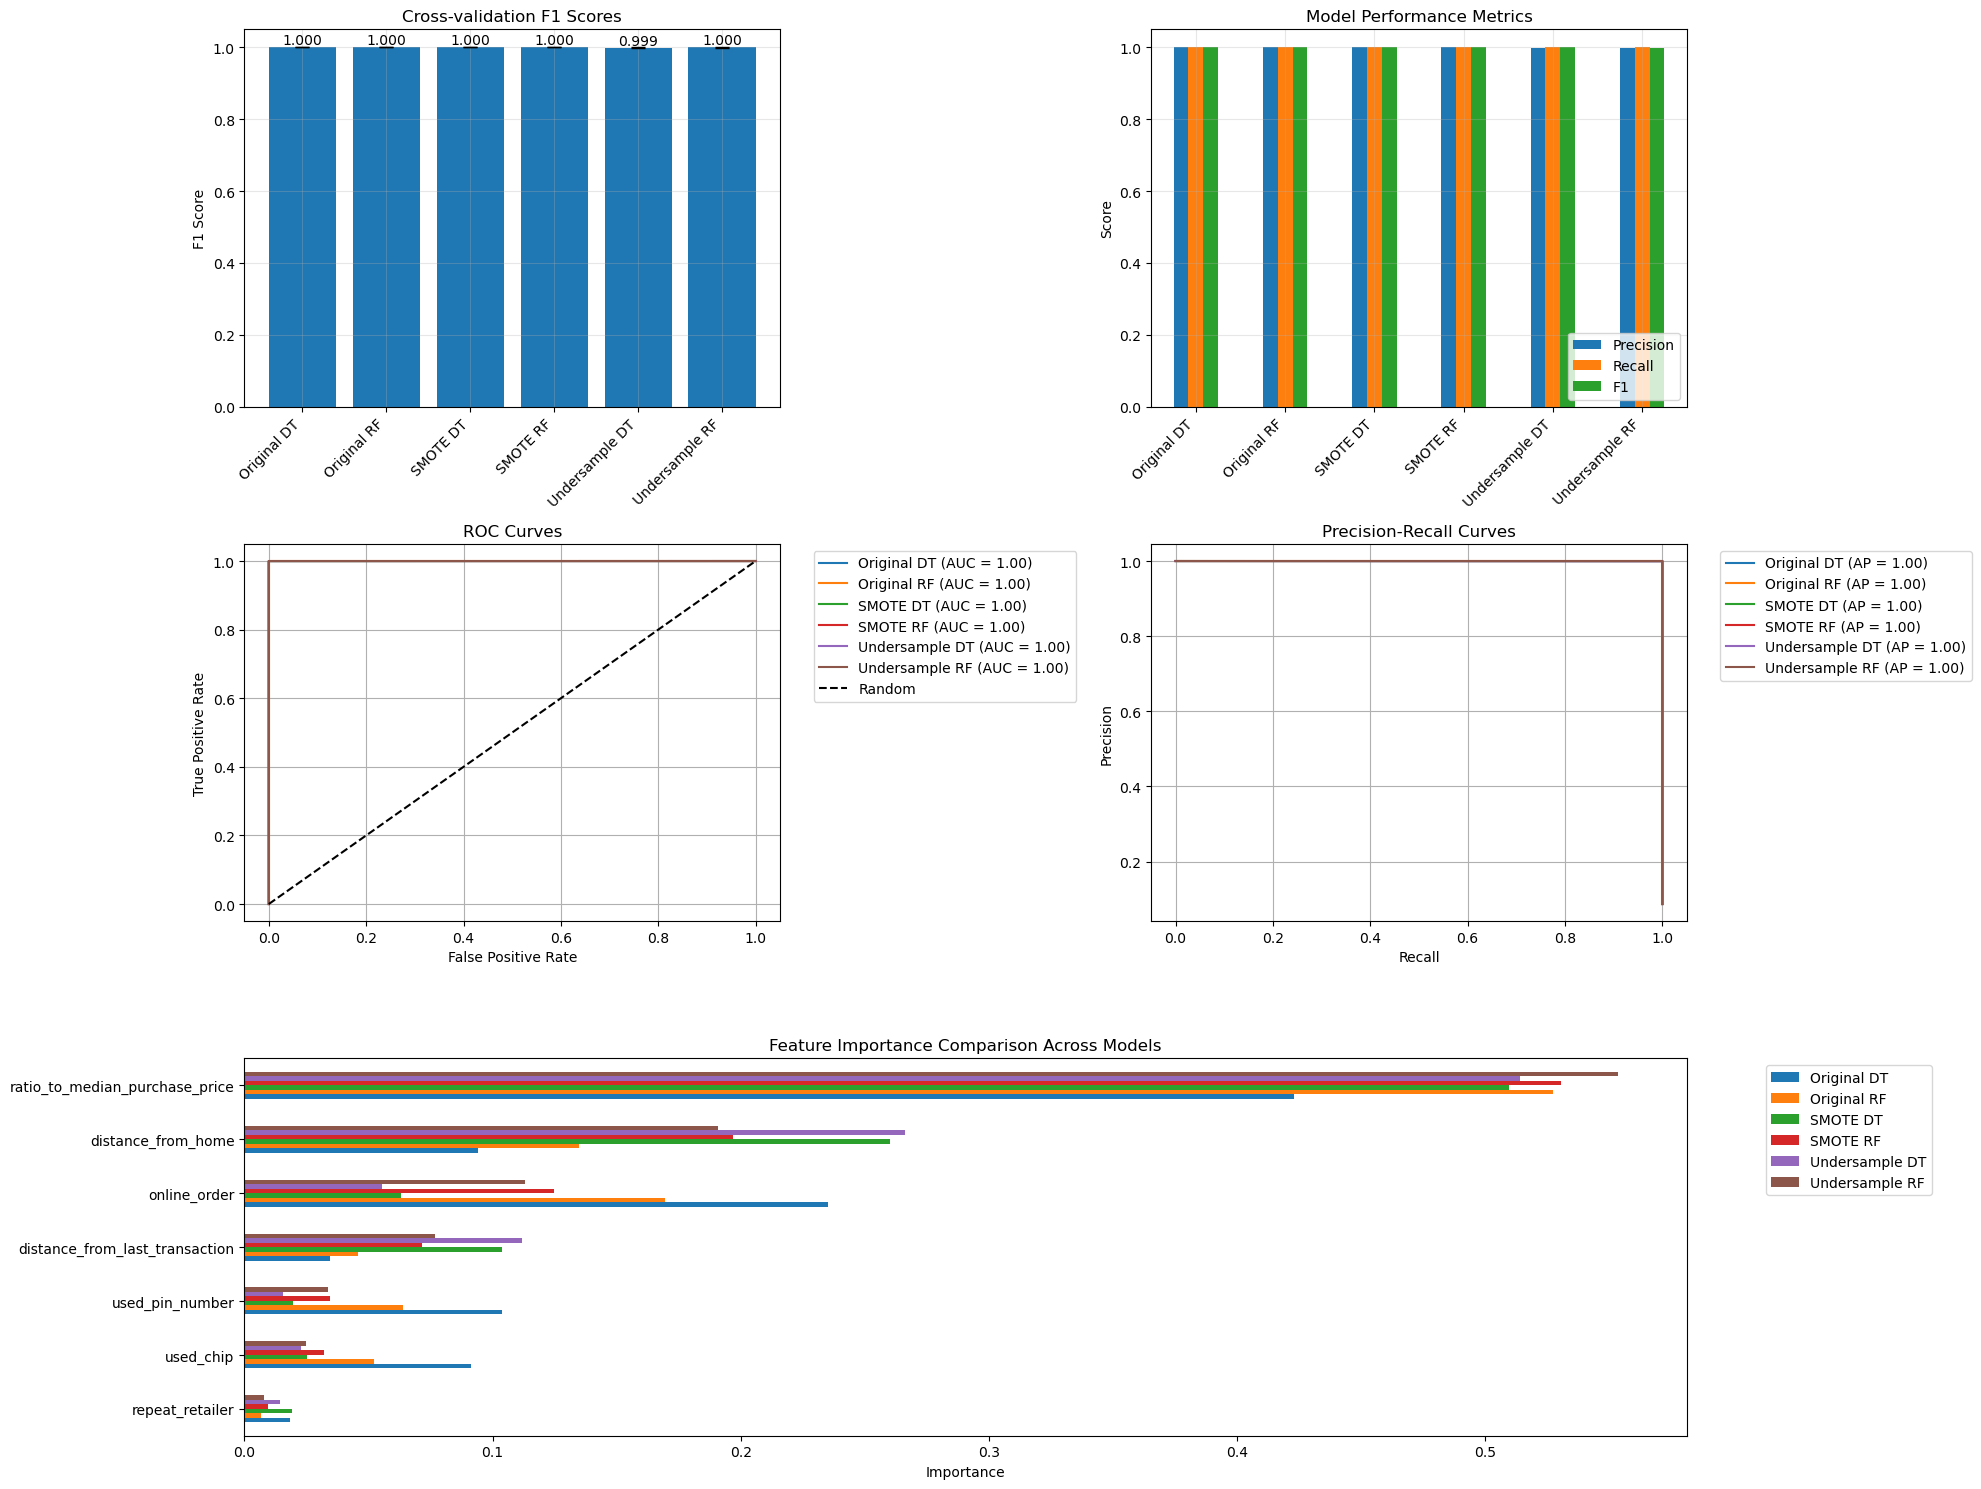


Detailed Performance Summary:
--------------------------------------------------------------------------------
                CV F1 (mean)  CV F1 (std)  Test Precision  Test Recall  \
Original DT           0.9999       0.0000          0.9999       0.9999   
Original RF           0.9999       0.0000          1.0000       0.9999   
SMOTE DT              0.9998       0.0001          0.9997       0.9999   
SMOTE RF              0.9999       0.0000          0.9999       0.9999   
Undersample DT        0.9994       0.0003          0.9993       0.9999   
Undersample RF        0.9995       0.0001          0.9987       1.0000   

                Test F1  
Original DT      0.9999  
Original RF      0.9999  
SMOTE DT         0.9998  
SMOTE RF         0.9999  
Undersample DT   0.9996  
Undersample RF   0.9994  

Best Performing Model: Original DT
Best F1 Score: 0.9999

Class Balance Information:
--------------------------------------------------------------------------------
Original class distr

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec

# Configure plot style
plt.style.use('default')

def get_feature_importance(model):
    """Safely extract feature importance from a model or pipeline"""
    if hasattr(model, 'named_steps'):
        return model.named_steps['classifier'].feature_importances_
    elif hasattr(model, 'feature_importances_'):
        return model.feature_importances_
    else:
        return None

def create_balanced_models():
    # Create sampling strategies
    smote = SMOTE(random_state=42)
    undersampler = RandomUnderSampler(random_state=42)
    
    # Create models with different sampling strategies
    models = {
        'Original DT': DecisionTreeClassifier(random_state=42),
        'Original RF': RandomForestClassifier(n_estimators=100, random_state=42),
        'SMOTE DT': Pipeline([
            ('smote', smote),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'SMOTE RF': Pipeline([
            ('smote', smote),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ]),
        'Undersample DT': Pipeline([
            ('undersampler', undersampler),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'Undersample RF': Pipeline([
            ('undersampler', undersampler),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ])
    }
    return models

def evaluate_models_cv(models, X, y, cv=5):
    results = {}
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    for name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        # Fit the model on the entire dataset for feature importance
        model.fit(X, y)
        
        # Safely get feature importance
        importance = get_feature_importance(model)
        if importance is not None:
            results[name]['feature_importance'] = importance
        
    return results

# Create and evaluate models
models = create_balanced_models()
cv_results = evaluate_models_cv(models, X_train, y_train)

# Fit models and get predictions for detailed metrics
model_predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
    else:
        # For models that don't support predict_proba, use decision_function if available
        try:
            y_pred_proba = model.decision_function(X_test)
            y_pred_proba = np.vstack((-y_pred_proba, y_pred_proba)).T
        except:
            y_pred_proba = np.array([[0, 1] if p else [1, 0] for p in y_pred])
    
    model_predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Create visualization
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 2, figure=fig)

# 1. Cross-validation Results
ax1 = fig.add_subplot(gs[0, 0])
cv_means = [results['cv_mean'] for results in cv_results.values()]
cv_stds = [results['cv_std'] for results in cv_results.values()]
x_pos = np.arange(len(models))

bars = ax1.bar(x_pos, cv_means, yerr=cv_stds, capsize=5)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models.keys(), rotation=45, ha='right')
ax1.set_title('Cross-validation F1 Scores')
ax1.set_ylabel('F1 Score')
ax1.grid(True, alpha=0.3)

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# 2. Performance Metrics Comparison
ax2 = fig.add_subplot(gs[0, 1])
metrics_df = pd.DataFrame({
    name: {
        'Precision': pred['precision'],
        'Recall': pred['recall'],
        'F1': pred['f1']
    } for name, pred in model_predictions.items()
}).T

metrics_df.plot(kind='bar', ax=ax2)
ax2.set_title('Model Performance Metrics')
ax2.set_ylabel('Score')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. ROC Curves
ax3 = fig.add_subplot(gs[1, 0])
for name, pred in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, pred['y_pred_proba'][:, 1])
    roc_auc = auc(fpr, tpr)
    ax3.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

ax3.plot([0, 1], [0, 1], 'k--', label='Random')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

# 4. Precision-Recall Curves
ax4 = fig.add_subplot(gs[1, 1])
for name, pred in model_predictions.items():
    precision, recall, _ = precision_recall_curve(y_test, pred['y_pred_proba'][:, 1])
    pr_auc = average_precision_score(y_test, pred['y_pred_proba'][:, 1])
    ax4.plot(recall, precision, label=f'{name} (AP = {pr_auc:.2f})')

ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curves')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True)

# 5. Feature Importance Comparison (only for models that support it)
feature_importance_dict = {}
for name, results in cv_results.items():
    if 'feature_importance' in results:
        feature_importance_dict[name] = results['feature_importance']

if feature_importance_dict:
    ax5 = fig.add_subplot(gs[2, :])
    feature_importance_df = pd.DataFrame(feature_importance_dict, index=X_train.columns)
    
    # Sort by average importance
    feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values('mean_importance', ascending=True)
    feature_importance_df = feature_importance_df.drop('mean_importance', axis=1)
    
    feature_importance_df.plot(kind='barh', ax=ax5)
    ax5.set_title('Feature Importance Comparison Across Models')
    ax5.set_xlabel('Importance')
    ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\nDetailed Performance Summary:")
print("-" * 80)
summary_df = pd.DataFrame({
    'CV F1 (mean)': {name: results['cv_mean'] for name, results in cv_results.items()},
    'CV F1 (std)': {name: results['cv_std'] for name, results in cv_results.items()},
    'Test Precision': {name: pred['precision'] for name, pred in model_predictions.items()},
    'Test Recall': {name: pred['recall'] for name, pred in model_predictions.items()},
    'Test F1': {name: pred['f1'] for name, pred in model_predictions.items()}
}).round(4)

print(summary_df)

# Find best performing model
best_model = summary_df['Test F1'].idxmax()
print(f"\nBest Performing Model: {best_model}")
print(f"Best F1 Score: {summary_df.loc[best_model, 'Test F1']:.4f}")

# Print class balance information
print("\nClass Balance Information:")
print("-" * 80)
print("Original class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

# Print top 5 most important features (if available)
if feature_importance_dict:
    print("\nTop 5 Most Important Features (Average Across Models):")
    print("-" * 80)
    mean_importance = feature_importance_df.mean(axis=1)
    top_features = mean_importance.nlargest(5)
    print(top_features)